We will do some experiments on the *Pima Indians Diabetes Dataset*. 
Download this dataset from this link: [
Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

**Dataset description:**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

*Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?*

---

Run the following cell to download the dataset, or upload the `diabetes.csv` file to this notebook

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from numpy.linalg import norm as L2Norm
import sklearn

Using Pandas, let's read the file and save all features are saved into matrix `X`, and the response values are saved into vector `y`. Print the first 5 rows of the dataframe.

In [ ]:
#TYPE YOUR ANSWER HERE
df = pd.read_csv("diabetes.csv");

X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])

print(X.shape, y.shape)
df.head()

(768, 8) (768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Section 0: Dataset Normalization
In machine learning problems, we usually prefer working with *normalized* data, meaning that all input features should have the same scale (mean 0 and variance 1). This will speed up the the optimization process and increase the numerical stability, etc.

$$
\textbf{x}_{normalized} = \frac{\textbf{x} - \bar{\textbf{x}}}{\sigma_{\textbf{x}}}
$$
where $\bar{\textbf{x}}$ and $\sigma_{\textbf{x}}$ are the mean and standard deviation of $\textbf{x}$, respectively.

---

With the given features matrix `X`, implement the `normalize_features(X)` function by subtracting the *mean* of each feature (column of `X`) and dividing by its standard deviation. The provided function `np.mean()` and `np.std()` might be useful. Becareful with the `axis`! 

In [ ]:
def normalize_features(X):
  #TYPE YOUR ANSWER HERE
  K = np.linalg.inv(np.diag(np.std(X, axis = 0)))
  return np.dot((X - np.mean(X, axis = 0)),K)

## Just for clarification, we cannot divide matrix by matrix. Infact, in terms of matrices, the X_bar = np.dot((X-mean), K)
## Where K is the inverse of the diagonal matrix of std components. Which means that Kij = 1/std(Xj), where (i,j) = (1,1), (2,2),...(n,n)
## and j is the feature(column) number of X.

## However, in Numpy, we can still write in an alternative way that X_bar = (X-X_mean)/STD
## Where STD = np.std(X, axis = 0) with dimension of (1, number of features). Numpy will transform 1/STD into the K matrix as mentioned above.
## Below is the test for that


X_norm = normalize_features(X)

In [ ]:
### [extra]
X_norm1=(X - np.mean(X, axis = 0))/np.std(X, axis=0)
print(f"Here is X_norm {X_norm}\n\n")
print(f"Here is X_norm1 {X_norm1}\n")

### The result is that X_norm = X_norm1

Here is X_norm [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Here is X_norm1 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505

## Section I: Logistic Regression with SKLearn 
Using the `sklearn` to do logistic regression. What are the coefficients and the bias of your model?

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split

#TYPE YOUR ANSWER HERE
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.2)

lr = LR(max_iter=100000)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('Mean squared error           :', sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Coefficient        : ",lr.coef_)
print("Intercept (or bias):", lr.intercept_)
print("Accuracy: ", sklearn.metrics.accuracy_score(y_test.ravel(), y_pred))

Mean squared error           : 0.21428571428571427
Coefficient        :  [[ 0.50677685  1.05981319 -0.27457329  0.11708987 -0.1843684   0.66829459
   0.32494546  0.10421091]]
Intercept (or bias): [-0.91521047]
Accuracy:  0.7857142857142857


##Section II: Logistic Regression with Gradient Descent

In [ ]:
#PROVIDED CODE, RUN THIS CELL! 
def print_result(logs, w):
  print("[Gradient Descent] Coefficients (alpha): "," ".join(["{:.05f}".format(i) for i in w[:-1]]))
  print("[Gradient Descent] Bias (beta): ", w[-1])
  plt.figure(figsize=(10,3))
  plt.plot(logs["grad_f_vals"], label = "||grad_L(w)||")
  plt.legend()
  plt.xlabel("Iterations", size=15)
  plt.ylabel("||grad_L(w)||", size=15)

**Step 1:** Implement the Sigmoid Function
$$S(\textbf{z}) = \frac{1}{1+e^{-\textbf{z}}}$$

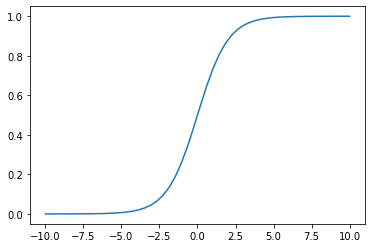

In [ ]:
def sigmoid(z):
  #TYPE YOUR ANSWER HERE
  return 1/(1+np.exp(-z))

#Visualization of Sigmoid Function
x_sig = np.linspace(-10,10)
y_sig = sigmoid(x_sig)
plt.plot(x_sig,y_sig)

**Step 2**:
Recall from the previous lab assignment, you learned how to solve linear regression with gradient descent. Now, let's do the same for logistic regression. Using the simoid function in the previous part, you will need to implement: 

* The loss function `L(X,y,w)`
* Gradient of the loss function `grad_L(X,y,w)`
* Update rule for the weight, with a given gradient and learning rate

---

**LOGISTIC REGRESSION WITH GRADIENT DESCENT**

With $\bar{\textbf{X}}$ is the augmented version of $\textbf{X}$ by stacking an all ones column to the end.
$$
J(\mathbf{w}) = -\frac{1}{N}\sum_{i=1}^n \left[\textbf{y}_i \log \textbf{z}_i + (1-\textbf{y}_i) \log (1 - \textbf{z}_i)\right]
$$
$$
    \nabla J(\textbf{w}) = \frac{1}{N} \sum_{i=1}^n \left[(\textbf{z}_i - \textbf{y}_i) \bar{\textbf{x}}_i \right]
$$
where $\textbf{z} = S(\bar{\textbf{X}}\textbf{w})$.

Gradient descent with fixed learning rate $\delta$:
$$
\textbf{w}_{k+1} = \textbf{w}_{k} - \delta.\nabla J(\textbf{w}_{k})
$$
Stopping criteria:
$$
  ||\nabla L(\textbf{w}_{k})||_2 < \epsilon
$$

---

Hint: The notation subscript $i$ here is just the $i^{th}$ element of a vector. Try to vectorize all the equations as much as you can. Summing across all training samples and divide by its total number is equivalent to calculate the mean in the first dimension (axis 0). Becareful with the shape of ($\textbf{z}$ - $\textbf{y}$) when subtracting, you might need to add an extra dimension.

(768, 9) (768, 1)
(9, 1)
[Gradient Descent] Coefficients (alpha):  0.41466 1.12274 -0.25691 0.00923 -0.13656 0.70687 0.31290 0.17486
[Gradient Descent] Bias (beta):  -0.8709518921034783


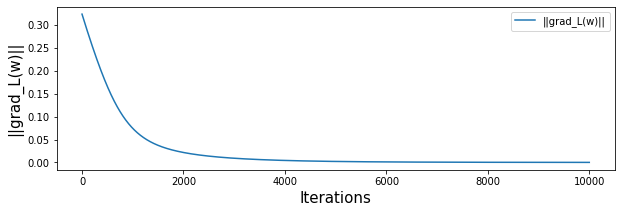

In [ ]:
def L(X,y,w):
    #TYPE YOUR ANSWER HERE
    N = X.shape[0]
    J_1 = np.dot(y.T, np.log(sigmoid(np.dot(X,w))))
    J_2 = np.dot((1-y).T, np.log(1-sigmoid(np.dot(X,w))))
    J = -1/N * (J_1 + J_2 )
    return J

def grad_L(X,y,w):
    #TYPE YOUR ANSWER HERE
    N = X.shape[0]
    grad_J = 1/N *np.dot(X.T, (sigmoid(np.dot(X, w)) - y))
    return grad_J


def gradient_descent(func, grad_func, X, y, w0, lr = 1e-1, eps = 1e-6, max_iter = 10000):
    """
    Runs gradient descent with a given loss function
    :param func(X,y,w): the loss function that you want to optimize, with given input X, label y and weight w
    :param grad_func(X,y,w): the gradient of the loss function
    :param X: training set
    :param y: label of the training set
    :param w0: initial weight
    :param lr: learning rate (fixed during training)
    :param eps: epsilon for the stopping criteria
    :param max_iters: the maximum number of iterations
    :return: logs of each step (list of dictionary), and the best weight w 
    """
    k = 1
    f_vals = []
    grad_f_vals = []
    w_hist = []
    logs   = {}
    w = w0.copy()
    while True:
        grad_f_k = grad_func(X, y, w) #gradient at step k
        #Stoping criteria
        if (L2Norm(grad_f_k) < eps) or (k > max_iter):
            return  {"f_vals": np.array(f_vals), 
                     "grad_f_vals": np.array(grad_f_vals), 
                     "w_hist": np.concatenate([w0] + w_hist, axis = -1)}, w.flatten()
        
        #Update params:
        
        w = w - lr*grad_f_k #TYPE YOUR ANSWER HERE 
        
        #Save logs
        f_vals.append(func(X,y,w))
        grad_f_vals.append(L2Norm(grad_f_k))
        w_hist.append(w)
        k+=1

#Normalize
X_bar = np.hstack([X_norm, np.ones((len(X),1))])   
y = y.reshape((-1,1))

print(X_bar.shape, y.shape)
#Weight initialization
w0 = np.random.rand(X.shape[1]+1).reshape((-1,1))
print(w0.shape)
#Run gradient descent
logs, w = gradient_descent(L, grad_L, X_bar, y, w0, lr = 0.01, max_iter = 10000)
#Print Result
print_result(logs,w)

In [ ]:
### Check accuracy:

y_pred = sigmoid(np.dot(X_test,w[:-1]) + w[-1])

###
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
###

y_pred_norm = sigmoid(np.dot(X_norm,w[:-1]) + w[-1])
y_pred_norm[y_pred_norm > 0.5] = 1
y_pred_norm[y_pred_norm <= 0.5] = 0

print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, y_pred))
print("Accuracy on the whole dataset", sklearn.metrics.accuracy_score(y, y_pred_norm))
### Look at the result, we can see that it's nearly the same with when we use sklearn

Accuracy on test set: 0.7857142857142857
Accuracy on the whole dataset 0.7825520833333334


Recall that you subtracted the mean and divided by the standard deviation of the input features, so the mode (coefficients and bias) you learned can only work on this *normalized* dataset. Now if you want to do switch back to the original one, how can you transform this learned weight into the one that can work on non-normalized dataset? Implement this function if you can. 

In [ ]:
#TYPE YOUR ANSWER HERE
def denormalize(X, w_norm):
  K = np.linalg.pinv(X - np.mean(X, axis = 0))
  W_denorm = np.dot(K, np.dot(X_norm,w[:-1]) + w[-1] - w_norm[-1])

  B = w_norm[-1] - np.dot(np.mean(X, axis = 0), W_denorm)
  return W_denorm, B

W, B = denormalize(X, w)

In [ ]:
### If denormalize successfully, then the accuracy of 2 prediction must be the same!!!!
### Test below:

y_pred_norm = sigmoid(np.dot(X_norm,w[:-1]) + w[-1])
y_pred_norm[y_pred_norm > 0.5] = 1
y_pred_norm[y_pred_norm <= 0.5] = 0


print("Accuracy of normalized prediction:", sklearn.metrics.accuracy_score(y, y_pred_norm))

####
y_pred_denorm = sigmoid(np.dot(X,W) + B)
y_pred_denorm[y_pred_denorm > 0.5] = 1
y_pred_denorm[y_pred_denorm <= 0.5] = 0

print("Accuracy of denormalized prediction:", sklearn.metrics.accuracy_score(y, y_pred_denorm))

print("Compare between normalized and denormalized predictions:", sklearn.metrics.accuracy_score(y_pred_norm, y_pred_denorm))

Accuracy of normalized prediction: 0.7825520833333334
Accuracy of denormalized prediction: 0.7825520833333334
Compare between normalized and denormalized predictions: 1.0
